In [1]:
import pandas as pd


In [33]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\python\ML\assigment\credit.csv")


In [71]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cols = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 
            'employment_length', 'personal_status', 'other_debtors', 'property', 
            'installment_plan', 'housing', 'telephone', 'foreign_worker', 'job']
for col in cols:
    data[col] = LE.fit_transform(data[col])
data.default.value_counts()

default
1    700
2    300
Name: count, dtype: int64

In [49]:
for col in cols:
    print(data[col].value_counts())

checking_balance
3    394
1    274
0    269
2     63
Name: count, dtype: int64
credit_history
4    530
0    293
1     88
3     49
2     40
Name: count, dtype: int64
purpose
7    280
1    234
5    181
2    103
0     97
4     50
8     22
3     12
6     12
9      9
Name: count, dtype: int64
savings_balance
2    603
4    183
0    103
1     63
3     48
Name: count, dtype: int64
employment_length
1    339
3    253
2    174
0    172
4     62
Name: count, dtype: int64
personal_status
3    548
1    310
2     92
0     50
Name: count, dtype: int64
other_debtors
2    907
1     52
0     41
Name: count, dtype: int64
property
1    332
2    282
0    232
3    154
Name: count, dtype: int64
installment_plan
1    814
0    139
2     47
Name: count, dtype: int64
housing
1    713
2    179
0    108
Name: count, dtype: int64
telephone
0    596
1    404
Name: count, dtype: int64
foreign_worker
1    963
0     37
Name: count, dtype: int64
job
1    630
3    200
0    148
2     22
Name: count, dtype: int64


In [51]:
x = data.drop(columns = ['default'],axis = 1)
y = data.default

In [53]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [125]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth = 5,random_state = 42)

In [127]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [129]:
y_pred = DTC.predict(x_test)

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82       209
           2       0.58      0.44      0.50        91

    accuracy                           0.73       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



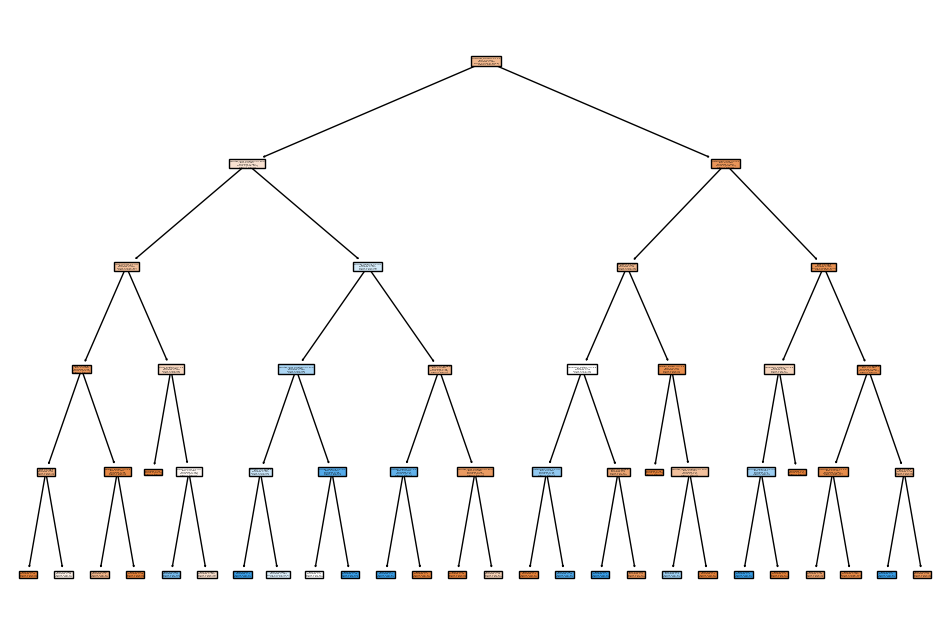

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(DTC, feature_names=data.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.show()


In [115]:
#using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [113]:
cross_val_score(DTC,x,y,cv = 5).mean()

0.704

In [137]:
y_p = cross_val_predict(DTC,x,y,cv = 10)

In [139]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

           1       0.76      0.84      0.80       700
           2       0.50      0.38      0.43       300

    accuracy                           0.70      1000
   macro avg       0.63      0.61      0.62      1000
weighted avg       0.68      0.70      0.69      1000



In [151]:
#using leaveOneOut 
from sklearn.model_selection import LeaveOneOut
LOO = LeaveOneOut()
print(cross_val_score(DTC,x,y,cv = LOO).mean())
y_p = cross_val_predict(DTC,x,y,cv = LOO)
print(classification_report(y,y_p))

0.735
              precision    recall  f1-score   support

           1       0.80      0.83      0.81       700
           2       0.56      0.52      0.54       300

    accuracy                           0.73      1000
   macro avg       0.68      0.67      0.68      1000
weighted avg       0.73      0.73      0.73      1000



In [178]:
#using shuffle split
from sklearn.model_selection import ShuffleSplit
SS = ShuffleSplit()
print(cross_val_score(DTC,x,y,cv = SS).mean())
#here it's not showing classifiction report because class is unbalanced
# y_p = cross_val_predict(DTC,x,y,cv = SS)
# print(classification_report(y,y_p))

0.756
